Task 02: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.
Dataset Link: https://www.kaggle.com/c/titanic/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [ ]:
desc = df.describe
print(desc)

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [ ]:
null_val = df.isnull().sum()
nunique_val = df.nunique().sum()
print("null_val: ", null_val, "nunique_val: ", nunique_val)

null_val:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 nunique_val:  2970


**Note: 177 age values are missing from the data, though we could have used methods like mean median mode to fill the ages but the author of this notebook of an age formulation through grouping based on class, relation and fare. Let's see if it works.**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Is_Alone'] = (df['Family_Size'] == 0).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1


Graphing everything before filling ages.

<ipython-input-59-83650bba9a59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', ax=axes[0, 1], palette='pastel')
<ipython-input-59-83650bba9a59>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', ax=axes[0, 2], palette='husl')
<ipython-input-59-83650bba9a59>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', ax=axes[1, 0], palette='coolwarm')
<ipython-input-59-83650bba9a59>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

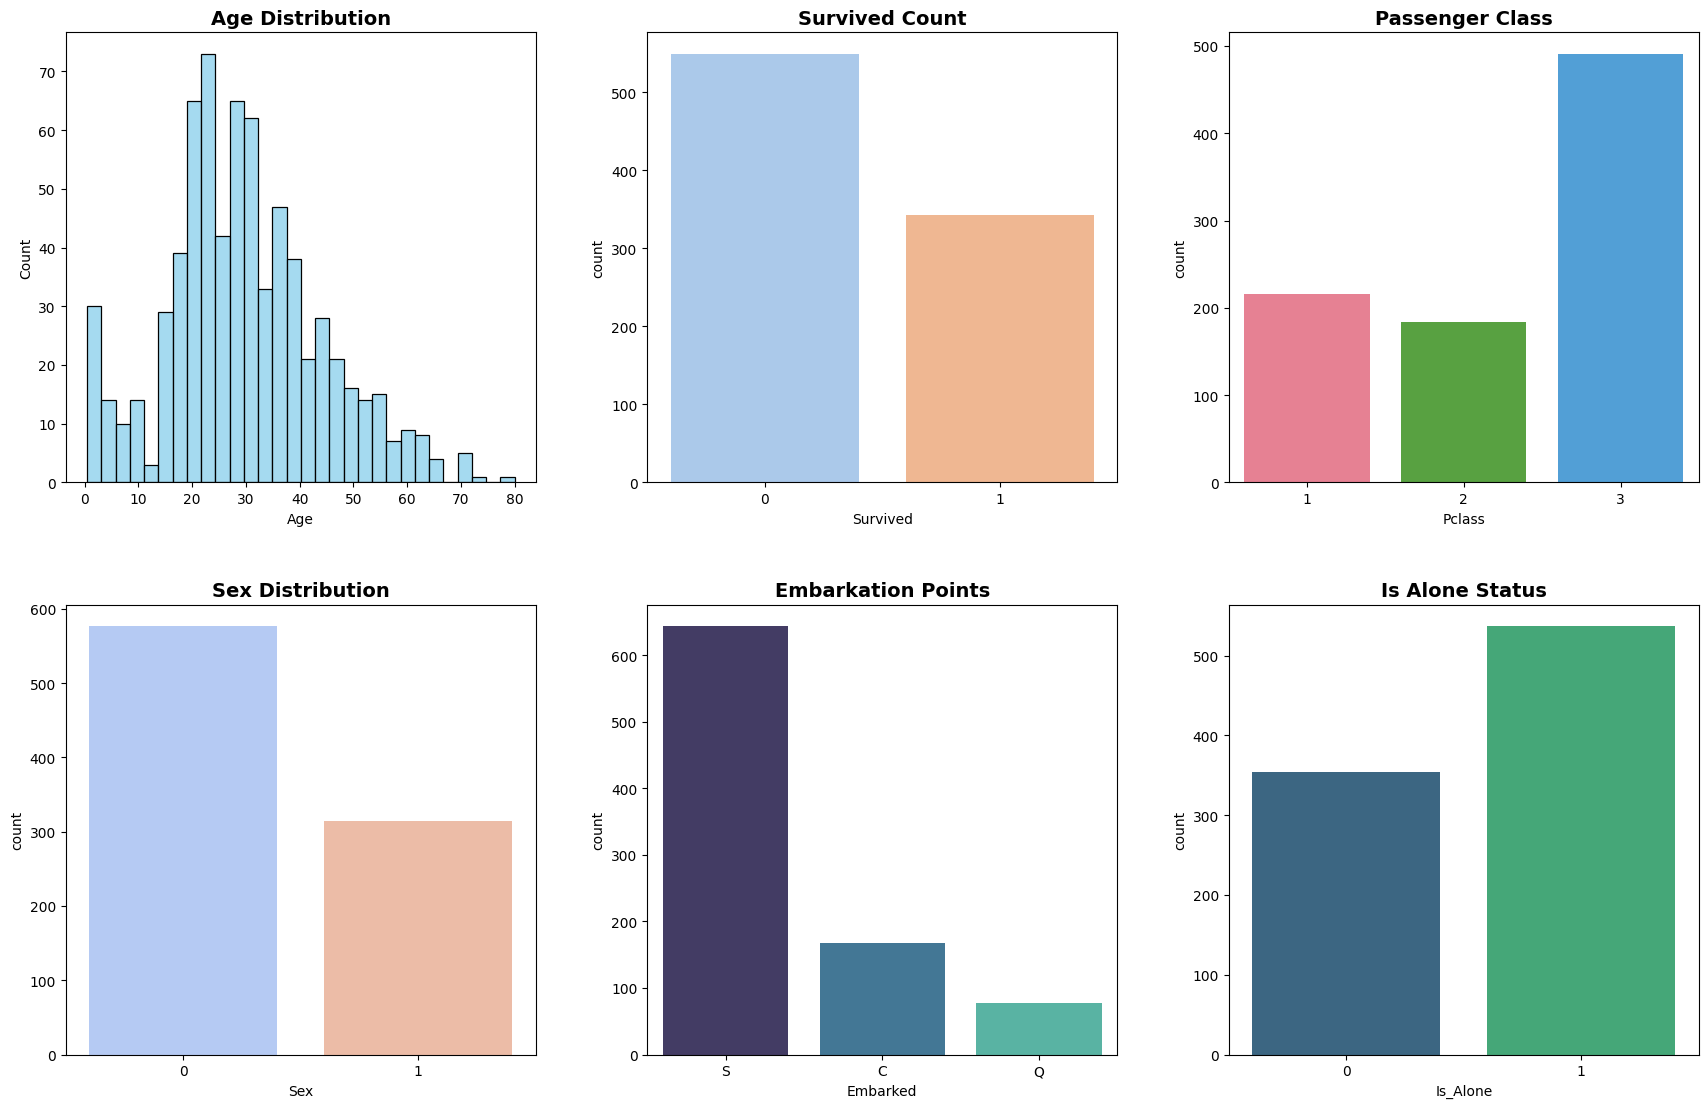

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Top row
sns.histplot(df['Age'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution', fontsize=14, weight='bold')

sns.countplot(data=df, x='Survived', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Survived Count', fontsize=14, weight='bold')

sns.countplot(data=df, x='Pclass', ax=axes[0, 2], palette='husl')
axes[0, 2].set_title('Passenger Class', fontsize=14, weight='bold')

# Bottom row
sns.countplot(data=df, x='Sex', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Sex Distribution', fontsize=14, weight='bold')

sns.countplot(data=df, x='Embarked', ax=axes[1, 1], palette='mako')
axes[1, 1].set_title('Embarkation Points', fontsize=14, weight='bold')

sns.countplot(data=df, x='Is_Alone', ax=axes[1, 2], palette='viridis')
axes[1, 2].set_title('Is Alone Status', fontsize=14, weight='bold')

plt.tight_layout(pad=4.0)
plt.show()


<ipython-input-60-21bc21452531>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='coolwarm', ax=axes[0, 0])


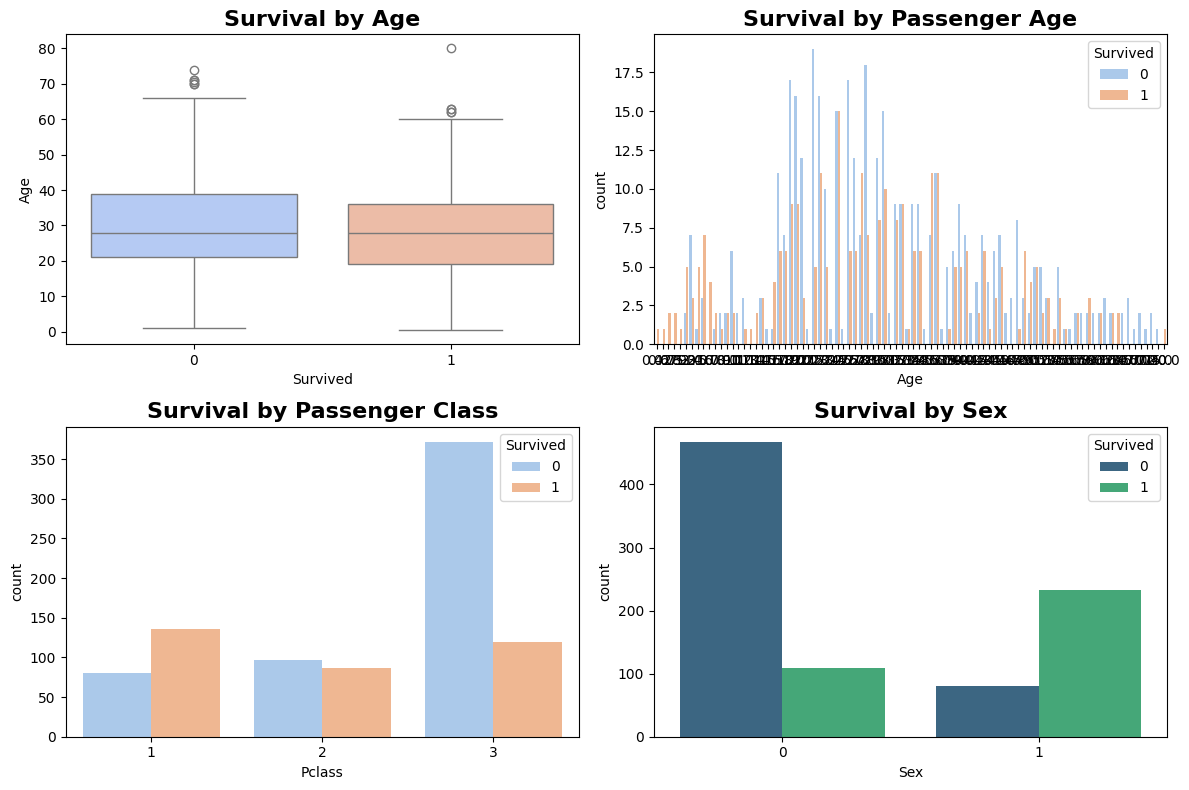

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Survival by Age
sns.boxplot(data=df, x='Survived', y='Age', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Survival by Age', fontsize=16, weight='bold')

# Survival by Age (countplot)
sns.countplot(data=df, x='Age', hue='Survived', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Survival by Passenger Age', fontsize=16, weight='bold')
axes[0, 1].legend(title='Survived', loc='upper right')

# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Survival by Passenger Class', fontsize=16, weight='bold')
axes[1, 0].legend(title='Survived', loc='upper right')

# Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Survival by Sex', fontsize=16, weight='bold')
axes[1, 1].legend(title='Survived', loc='upper right')

plt.tight_layout()
plt.show()


Handling the missing Values from here.

In [ ]:
# Extract relevant columns: 'Fare', 'Age', and 'Pclass'
fare_details = df[['Fare', 'Age', 'Pclass']]
print(fare_details.head())

sorted_fare_details = fare_details.sort_values(by='Fare', ascending=False)
print(sorted_fare_details.head())


      Fare   Age  Pclass
0   7.2500  22.0       3
1  71.2833  38.0       1
2   7.9250  26.0       3
3  53.1000  35.0       1
4   8.0500  35.0       3
         Fare   Age  Pclass
258  512.3292  35.0       1
737  512.3292  35.0       1
679  512.3292  36.0       1
88   263.0000  23.0       1
27   263.0000  19.0       1


In [ ]:
# New column to store if the passenger/s were traveling alone,
df['Is_Alone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)

max_fare_per_class = df.groupby(['Pclass', 'Is_Alone'])['Fare'].max()
avg_fare_per_class = df.groupby(['Pclass', 'Is_Alone'])['Fare'].mean()

print("max_fare: ",max_fare_per_class)
print("avg_fare: ", avg_fare_per_class)

max_fare:  Pclass  Is_Alone
1       False       512.3292
        True        512.3292
2       False        73.5000
        True         73.5000
3       False        69.5500
        True         56.4958
Name: Fare, dtype: float64
avg_fare:  Pclass  Is_Alone
1       False       105.019706
        True         63.672514
2       False        29.237084
        True         14.066106
3       False        22.218864
        True          9.272052
Name: Fare, dtype: float64


In [ ]:
# Group by 'Pclass' and 'Is_Alone' to find average 'Age' for each group
avg_age_per_group = df.groupby(['Pclass', 'Is_Alone'])['Age'].mean()

print("Average age per group (Pclass, Is_Alone):")
print(avg_age_per_group)

Average age per group (Pclass, Is_Alone):
Pclass  Is_Alone
1       False       35.849200
        True        41.005814
2       False       25.391625
        True        33.736559
3       False       19.784000
        True        28.235556
Name: Age, dtype: float64


Estimating Age inplace of null/empty values.

In [ ]:
# Function to estimate age based on pclass, Is_Alone, and fare
def estimate_age_with_fare(row, avg_age_per_group, avg_fare_per_class):
    if pd.isnull(row['Age']):
        # 1. Average age for the corresponding group (Pclass, Is_Alone)
        avg_age = avg_age_per_group.get((row['Pclass'], row['Is_Alone']), np.nan)
        avg_fare = avg_fare_per_class.get((row['Pclass'], row['Is_Alone']), np.nan)

        if avg_age is not np.nan and avg_fare is not np.nan:
            # Assumption one, low fare + low class = young
            if row['Pclass'] == 3 and row['Is_Alone'] == True:
                fare_diff = row['Fare'] - avg_fare
                adjusted_age = avg_age - (fare_diff * 0.1)  # 0.1 is an arbitrary scaling factor
                return adjusted_age
            else:
                return avg_age
    return row['Age']

# Apply the function to fill missing age values only (where Age is NaN)
df.loc[df['Age'].isnull(), 'Age'] = df[df['Age'].isnull()].apply(estimate_age_with_fare, axis=1, avg_age_per_group=avg_age_per_group, avg_fare_per_class=avg_fare_per_class)
print(df[['Pclass', 'Is_Alone', 'Age', 'Fare']].head())
print(f"Missing age values after imputation: {df['Age'].isnull().sum()}")


   Pclass  Is_Alone   Age     Fare
0       3     False  22.0   7.2500
1       1     False  38.0  71.2833
2       3      True  26.0   7.9250
3       1     False  35.0  53.1000
4       3      True  35.0   8.0500
Missing age values after imputation: 0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Cabin'].unique(), df['Embarked'].unique()

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [ ]:
df['Cabin_Class'] = df['Cabin'].str.extract('([A-Za-z]+)', expand=False)
print(df['Cabin_Class'].value_counts())

Cabin_Class
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


In [ ]:
#Cabin_Class and Fare relationship
cabin_fare_relation = df.groupby('Cabin_Class')['Fare'].mean()
print(cabin_fare_relation)

Cabin_Class
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
T     35.500000
Name: Fare, dtype: float64


In [ ]:
# Cabin_Class and Is_Alone relationship
max_fare_per_cabin = df.groupby(['Cabin_Class', 'Is_Alone', 'Family_Size'])['Fare'].max() #Finding max fare paid
mode_fare_per_cabin = df.groupby(['Cabin_Class', 'Is_Alone', 'Family_Size'])['Fare'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan) #Finding common fare paid

print("max_fare: \n", max_fare_per_cabin)
print("mode_fare: \n", mode_fare_per_cabin)

max_fare: 
 Cabin_Class  Is_Alone  Family_Size
A            False     1              133.6500
                       2              164.8667
                       3               65.0000
                       4               34.3750
                       5               39.6875
                       6               31.3875
                       7               46.9000
                       10              69.5500
             True      0              512.3292
B            False     1              512.3292
                       2               93.5000
                       3              120.0000
                       4              262.3750
             True      0              512.3292
C            False     1              227.5250
                       2              211.5000
                       3              151.5500
                       5              263.0000
             True      0              227.5250
D            False     1              113.2750
             

In [ ]:
# Mode values for reference
mode_fare = {
    ('A', False, 1): 39.6,
    ('A', False, 2): 81.86,
    ('A', True, 0): 30.69,
    ('B', False, 1): 57.98,
    ('B', False, 2): 49.5,
    ('B', True, 0): 69.3,
    ('C', False, 1): 89.1,
    ('C', False, 2): 110.88,
    ('C', True, 0): 27.75,
    ('D', False, 1): 76.73,
    ('D', True, 0): 12.88,
    ('E', False, 1): 55.44,
    ('E', False, 2): 83.16,
    ('E', True, 0): 56.93,
    ('F', False, 2): 22.36,
    ('F', True, 0): 7.75,
    ('G', False, 1): 10.46,
    ('T', True, 0): 35.5
}


In [ ]:
def assume_cabin_class(row):
    if pd.isnull(row['Cabin_Class']):
        key = (row['Cabin_Class'], row['Is_Alone'], row['Family_Size'])

        # Defaulting to 'A', because this class has the most diverse range of passengers irrespective of class, fare and company.
        return mode_fare.get(key, 'A')
    return row['Cabin_Class']


In [ ]:
df['Cabin_Class'] = df.apply(assume_cabin_class, axis=1)

In [ ]:
df['Embarked'] = df['Embarked'].ffill()

In [ ]:
df = df.drop(columns=['Cabin'])

In [ ]:
#Checking for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Final Visualisation after EDA for Comparison.


<ipython-input-128-83650bba9a59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', ax=axes[0, 1], palette='pastel')
<ipython-input-128-83650bba9a59>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', ax=axes[0, 2], palette='husl')
<ipython-input-128-83650bba9a59>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', ax=axes[1, 0], palette='coolwarm')
<ipython-input-128-83650bba9a59>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

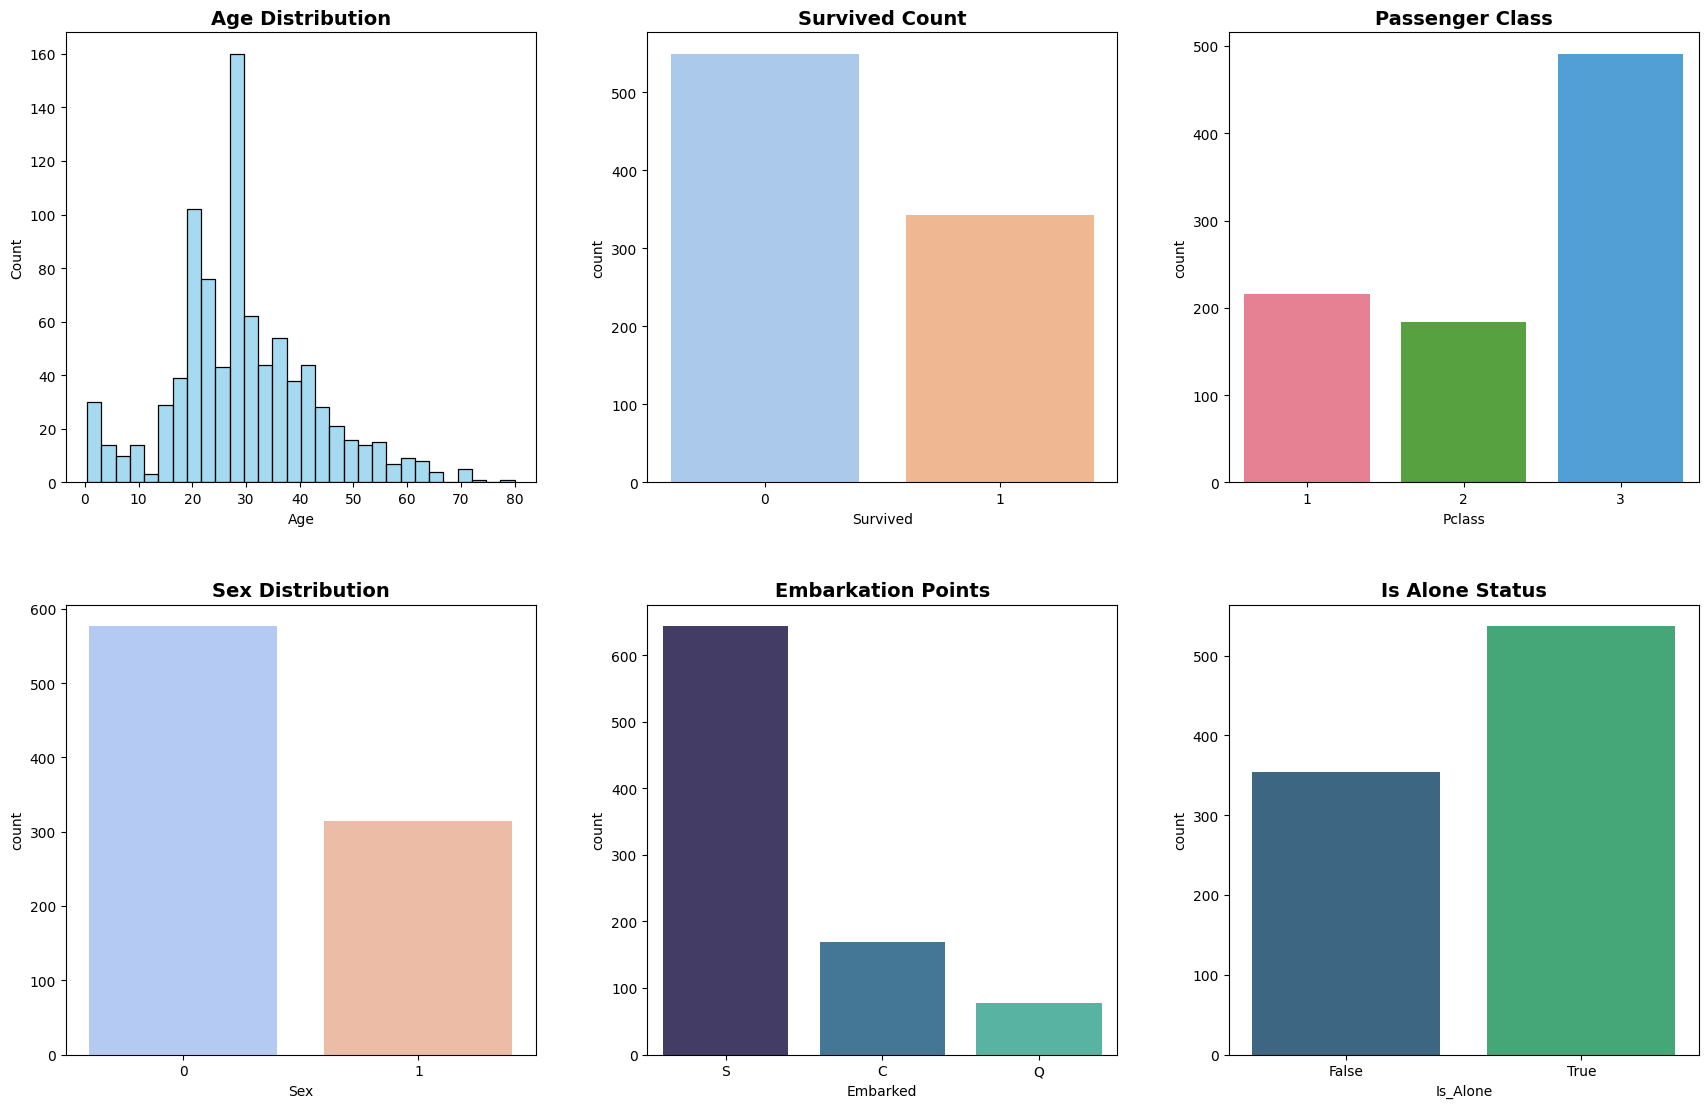

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(df['Age'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution', fontsize=14, weight='bold')

sns.countplot(data=df, x='Survived', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Survived Count', fontsize=14, weight='bold')

sns.countplot(data=df, x='Pclass', ax=axes[0, 2], palette='husl')
axes[0, 2].set_title('Passenger Class', fontsize=14, weight='bold')

# Bottom row
sns.countplot(data=df, x='Sex', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Sex Distribution', fontsize=14, weight='bold')

sns.countplot(data=df, x='Embarked', ax=axes[1, 1], palette='mako')
axes[1, 1].set_title('Embarkation Points', fontsize=14, weight='bold')

sns.countplot(data=df, x='Is_Alone', ax=axes[1, 2], palette='viridis')
axes[1, 2].set_title('Is Alone Status', fontsize=14, weight='bold')

plt.tight_layout(pad=4.0)
plt.show()


<ipython-input-129-21bc21452531>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='coolwarm', ax=axes[0, 0])


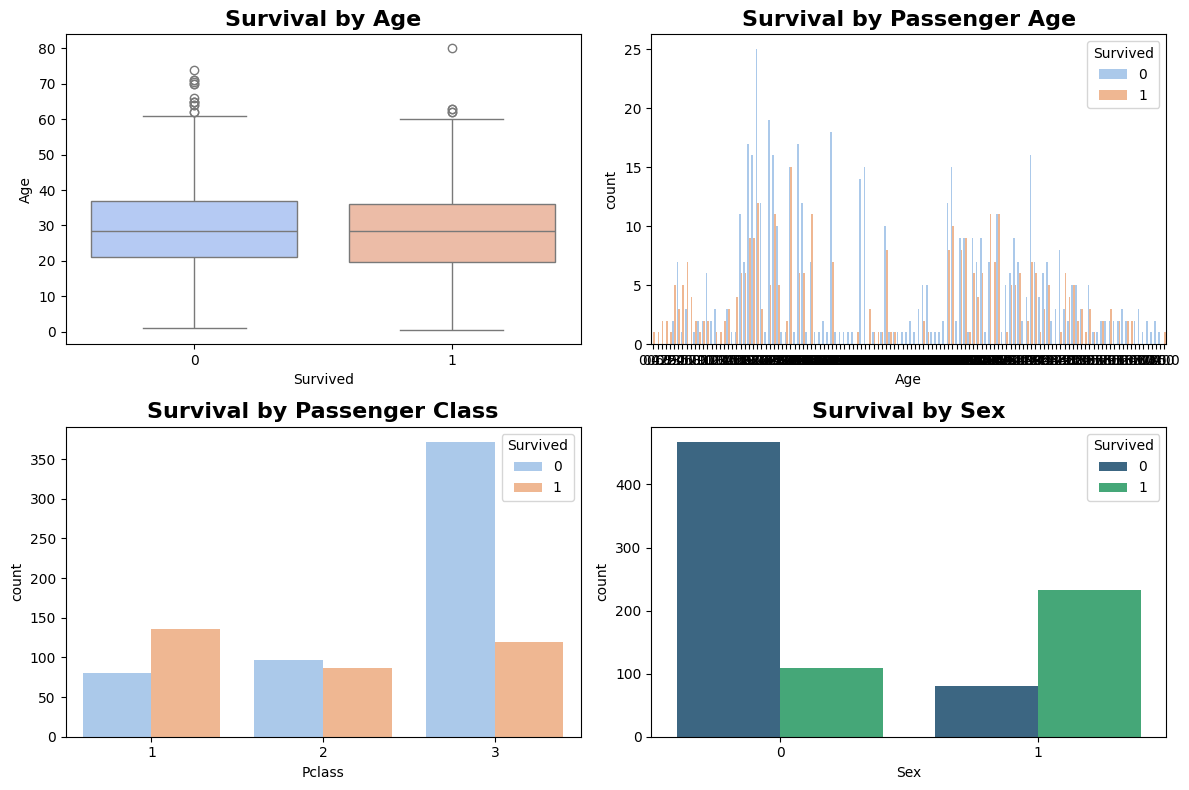

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Survival by Age
sns.boxplot(data=df, x='Survived', y='Age', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Survival by Age', fontsize=16, weight='bold')

# Survival by Age (countplot)
sns.countplot(data=df, x='Age', hue='Survived', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Survival by Passenger Age', fontsize=16, weight='bold')
axes[0, 1].legend(title='Survived', loc='upper right')

# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Survival by Passenger Class', fontsize=16, weight='bold')
axes[1, 0].legend(title='Survived', loc='upper right')

# Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Survival by Sex', fontsize=16, weight='bold')
axes[1, 1].legend(title='Survived', loc='upper right')

plt.tight_layout()
plt.show()


EDA and Exploration of relationships ends here as per the task. Machine learning model training will be showcased in another Notebook with lesser code cells.